<a href="https://colab.research.google.com/github/ahmedelgamal0/loan-prediction/blob/main/Loan_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Exploring the Data

This section explores the train and test datasets as shown below.

- **The train dataset** contains 614 observations and 13 features represents 12 independent variables and 1 target variable.
- **The test dataset** contains the same features except the target variable.
- The data type of each variable is also provided below whether its categorical or numerical.


In [73]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline

In [74]:
sns.set_theme()

In [75]:
# Importing the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_original=train.copy() 
test_original=test.copy()

In [76]:
t_copy = train.copy()

**The dataset consists of the following columns:**

- **Loan_ID :** Unique Loan ID<br>
- **Gender :** Male/ Female<br>
- **Married :** Applicant married (Y/N)<br>
- **Dependents :** Number of dependents <br>
- **Education :** Applicant Education (Graduate/ Under Graduate)<br>
- **Self_Employed :** Self employed (Y/N)<br>
- **ApplicantIncome :** Applicant income<br>
- **CoapplicantIncome :** Coapplicant income<br>
- **LoanAmount :** Loan amount in thousands of dollars<br>
- **Loan_Amount_Term :** Term of loan in months<br>
- **Credit_History :** credit history meets guidelines yes or no<br>
- **Property_Area :** Urban/ Semi Urban/ Rural<br>
- **Loan_Status :** Loan approved (Y/N) this is the target variable<br>

In [77]:
# Understanding the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
# Checking the columns and the shape of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
# Checking the columns and the shape of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis (EDA)

## Univariate Analysis

Univariate analysis is used in this section to analyze each variable individually.

**For numerical features** ,we can use Probability Density Functions(PDF) to look at the distribution of the numerical variables.

**For categorical features** ,frequency tables or bar plots can be used to calculate the number of each category in a particular variable. 



### Categorical Features

In [126]:
categorical_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

def visualize_categorical_data(df, columns, nrows, ncols, figsize):
    """
    Creates a grid of pie charts to visualize the distribution of categorical features.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features to be plotted.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).

    Returns:
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):

        # Each category value count
        val_count = df[column].value_counts()

        # Create a pie chart
        axs.flat[i].pie(val_count, labels=val_count.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{column} Distribution')

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show() 


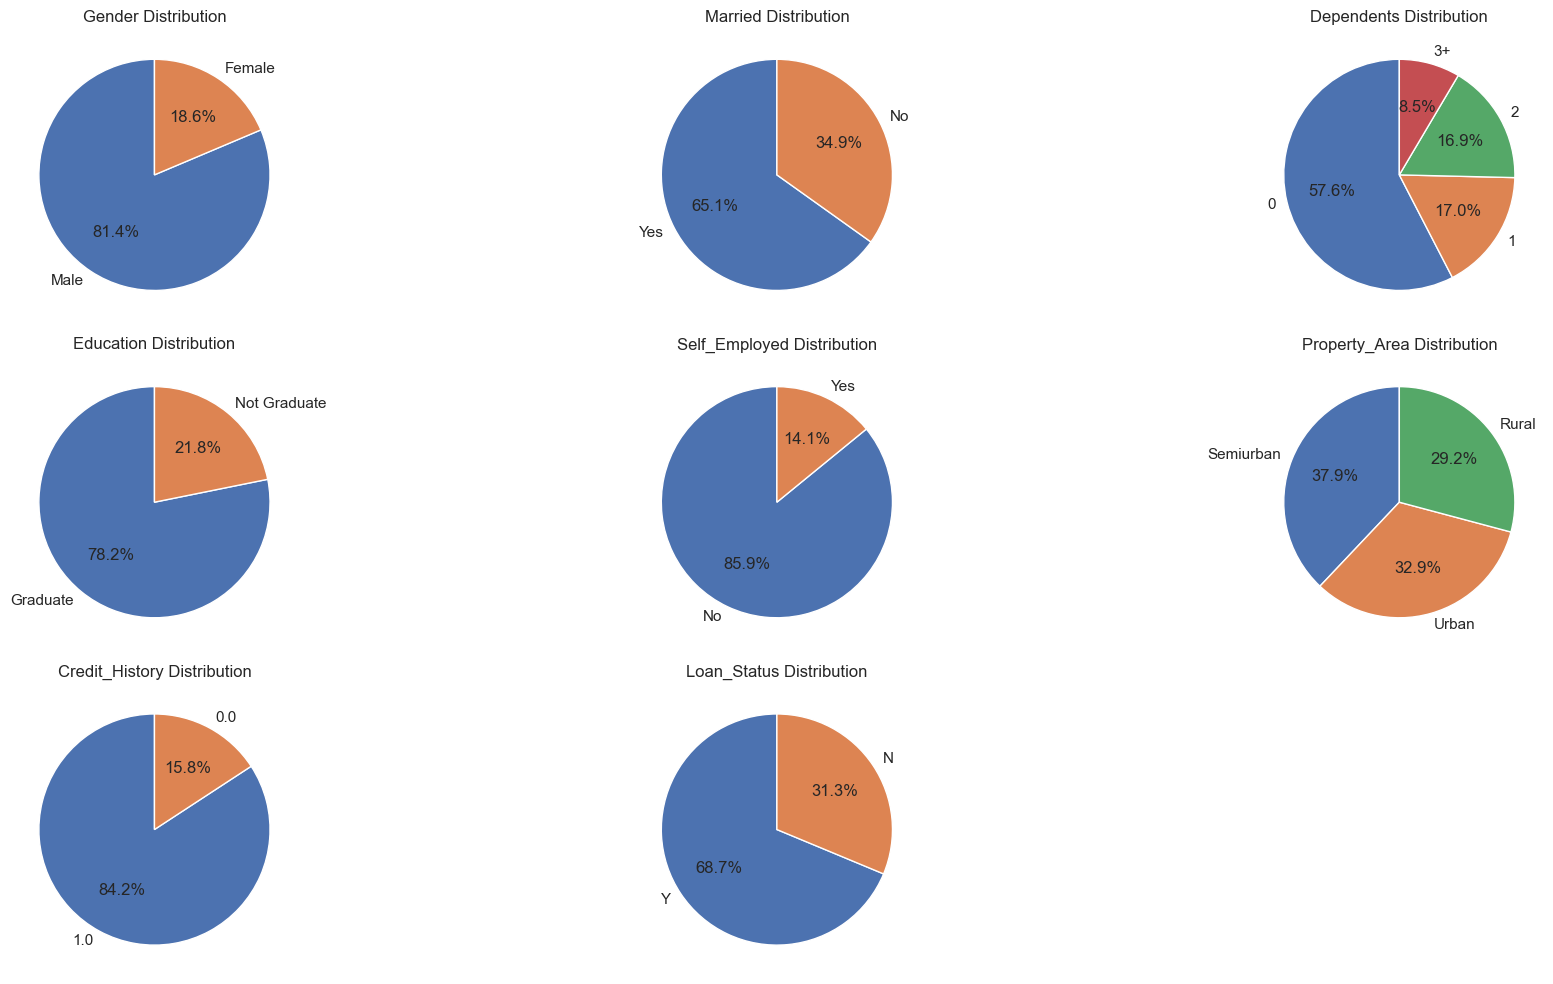

In [127]:
visualize_categorical_data(train, categorical_var, 3, 3, (20, 10))

Text(0.5, 1.0, 'Loan Amount Term')

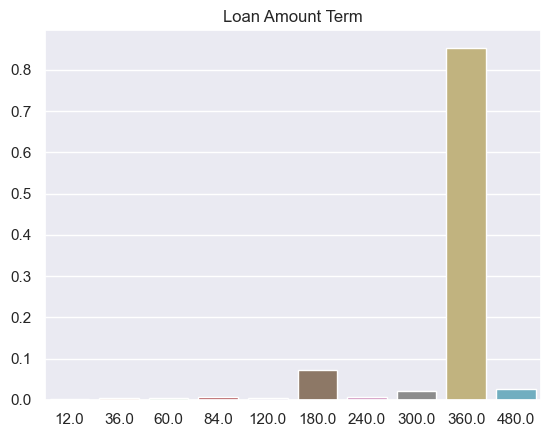

In [87]:
Loan_Amount_Term_values = train['Loan_Amount_Term'].value_counts(sort=True, normalize=True)
sns.barplot(x=Loan_Amount_Term_values.index, y=Loan_Amount_Term_values.values, )
plt.title('Loan Amount Term')

### Numerical Features

In [122]:
numerical_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

def visualize_numerical_data(df, columns, nrows, ncols, figsize, plot_type='hist'):

    """
        Creates a grid of plots to visualize the distribution of numerical features.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the numerical features to be plotted.
    columns : list
        A list of column names corresponding to the numerical features to be plotted.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).
    plot_type : str, optional
        The type of plot to create for each feature. Valid options are 'hist' (default), 
        'box', and 'violin'.

    Returns:
    --------
    None
        Displays the plot figure.
    """
    
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    for i, column in enumerate(columns):    
        if plot_type == 'box':
            sns.boxplot(y=column, data=df, ax=axs.flat[i]) 
        elif plot_type == 'violin':
                sns.violinplot(y=column, data=df, ax=axs.flat[i])
        elif plot_type == 'hist':
            sns.histplot(data=df, x=column, ax=axs.flat[i], kde=True, stat='count')    
                
    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show()


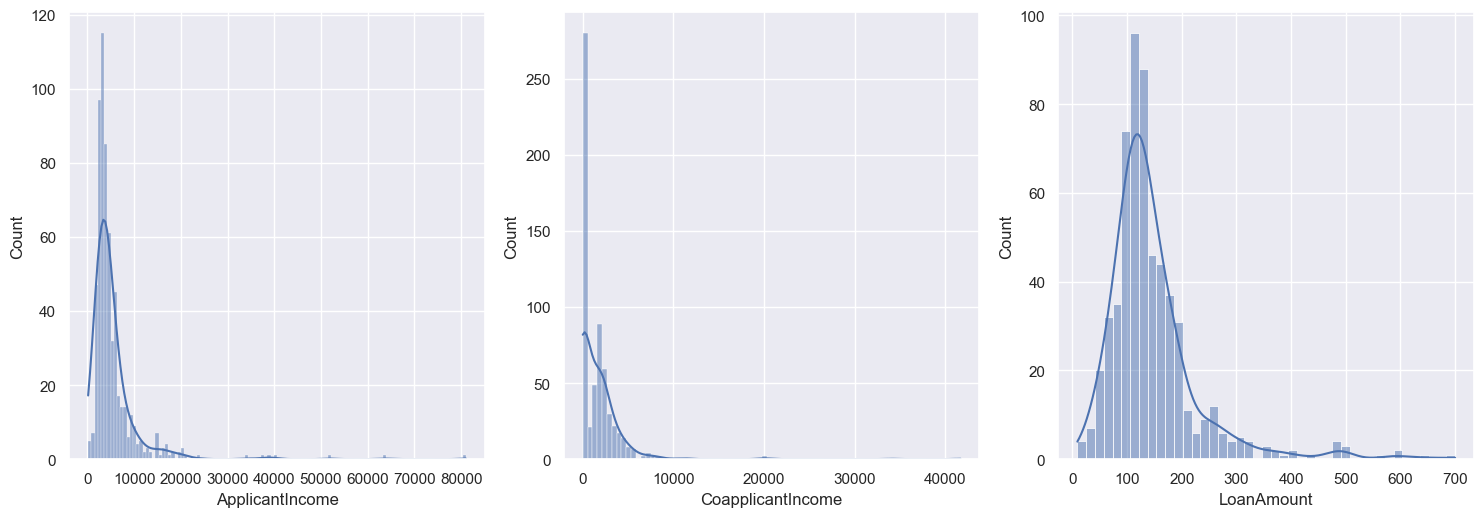

In [123]:
visualize_numerical_data(train, numerical_var, 2, 3, (15, 10))

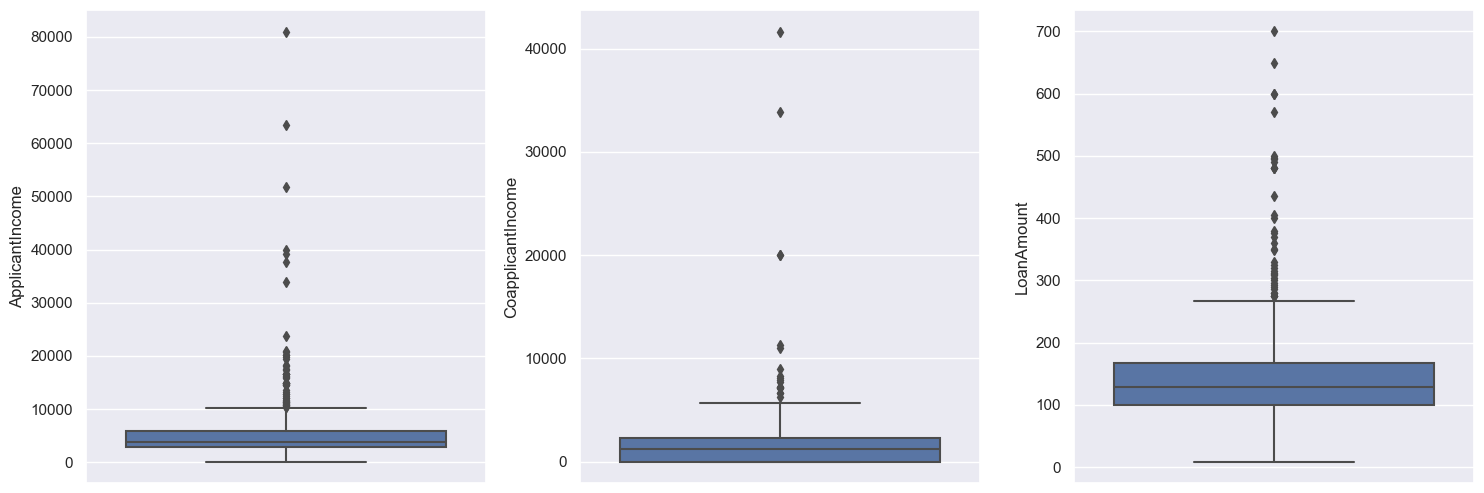

In [124]:
visualize_numerical_data(train, numerical_var, 2, 3, (15, 10), 'box')

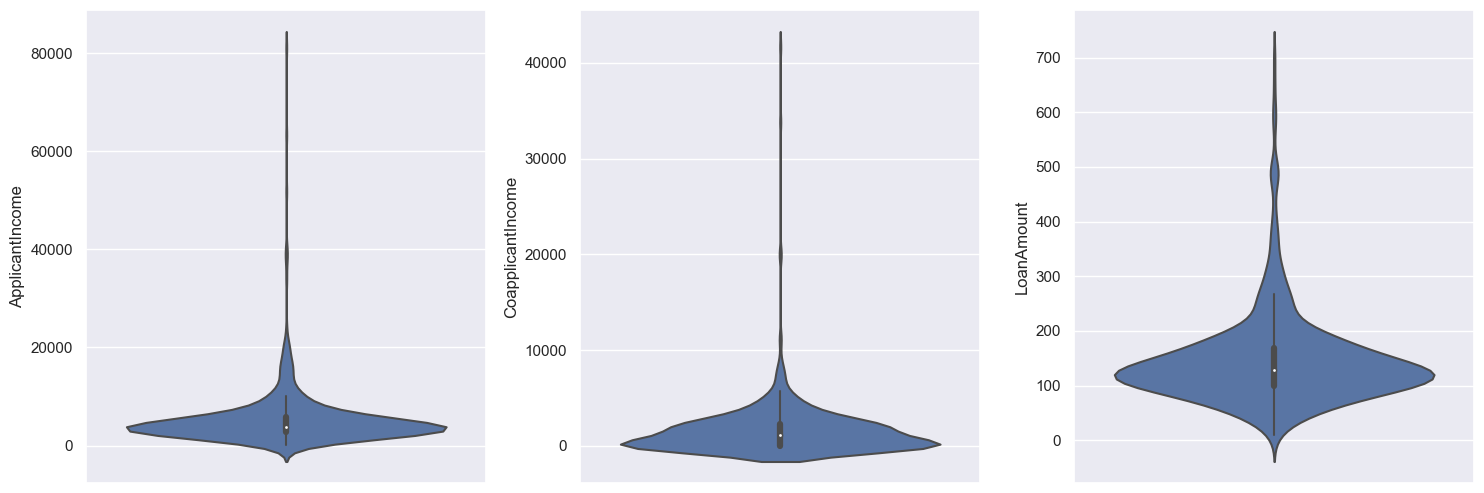

In [125]:
visualize_numerical_data(train, numerical_var, 2, 3, (15, 10), 'violin')


### Insights from the univariate analysis.

- 81.4% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Most of the applicants don’t have dependents.
- 78.2% of the applicants are graduates.
- About 15% of applicants in the dataset are self-employed.
- About 85% of the applicants chosed the loan on 360 months.
- 84.2% of applicants have repaid their debts.
- Most of the applicants are from semi-urban areas.
- 68.7% of the applicants got the approval.
- The applicant income and coapplicant income has a similiar extremely left-skewed distribution.
- The loan amount is fairly normal but contains outliers.

## Bivariate Analysis

Bivariate Analysis is used in this section to know how well each feature correlates with Loan Status.

### Categorical Features vs Target Variable

In [118]:
def visualize_categorical_data_with_target(df, columns, target, nrows, ncols, figsize):
    """
        Creates a grid of count plots to visualize the relationship between categorical 
        features and a target variable.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features and target variable.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    target : str
        The name of the target variable column in the dataframe.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).

    Returns:
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):
        sns.countplot(x=column, hue=target, data=df, ax=axs.flat[i])
    
    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])
    
    fig.tight_layout()
    plt.show()

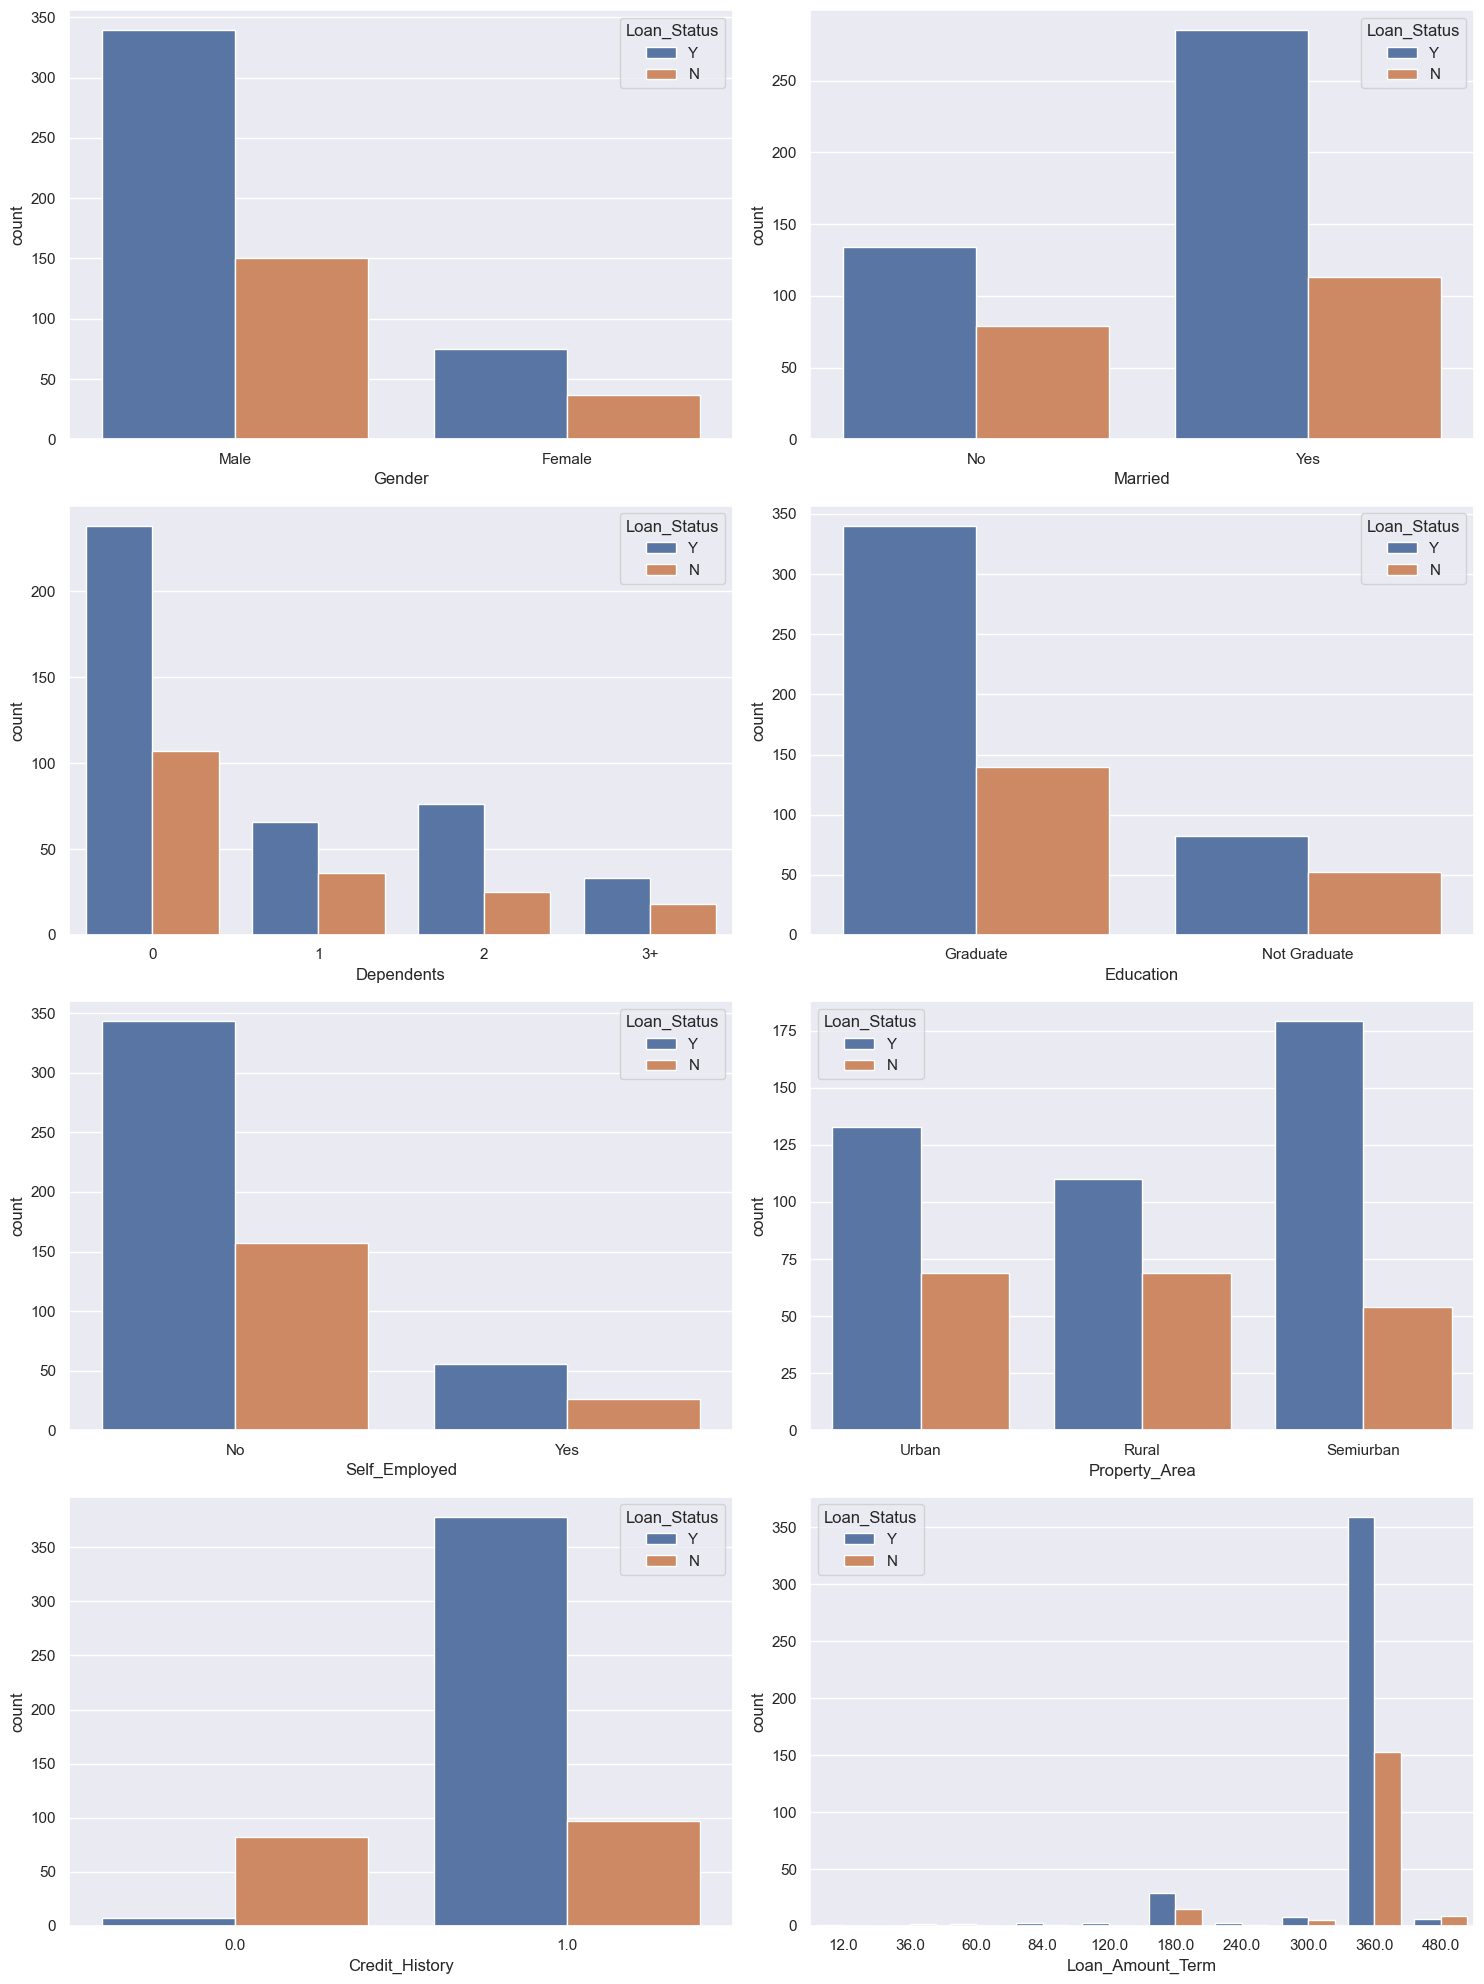

In [121]:
visualize_categorical_data_with_target(train, categorical_var[:-1] + ['Loan_Amount_Term'], 'Loan_Status', 4, 2, (15, 20))

### Numerical Features vs Target Variable

In [53]:
train[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [138]:
def visualize_numerical_data_with_target(df, columns, target, nrows, ncols, figsize, plot_type='box'):
    """
    Visualize the relationship between numerical features and a target variable.
    
        Parameters:
    df : pandas.DataFrame
        The input dataframe containing the numerical features and target variable.
    columns : list
        A list of column names corresponding to the numerical features to be plotted.
    target : str
        The name of the target variable column in the dataframe.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).
    plot_type : str, optional
        The type of plot to create for each feature. Valid options are 'box' (default) 
        and 'violin'.
        
    Returns:
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):
        if plot_type == 'box':
            sns.boxplot(x=target, y=column, data=df, ax=axs.flat[i])
        elif plot_type == 'violin':
            sns.violinplot(x=target, y=column, data=df, ax=axs.flat[i])

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show()

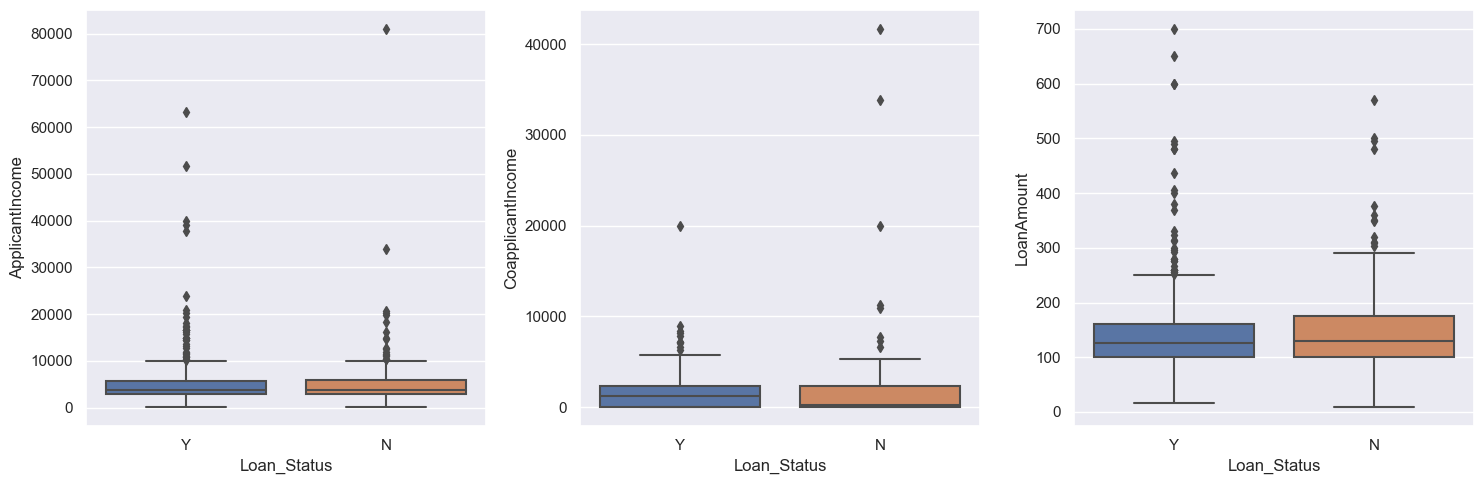

In [133]:
visualize_numerical_data_with_target(train, numerical_var, 'Loan_Status', 1, 3, (15, 5))

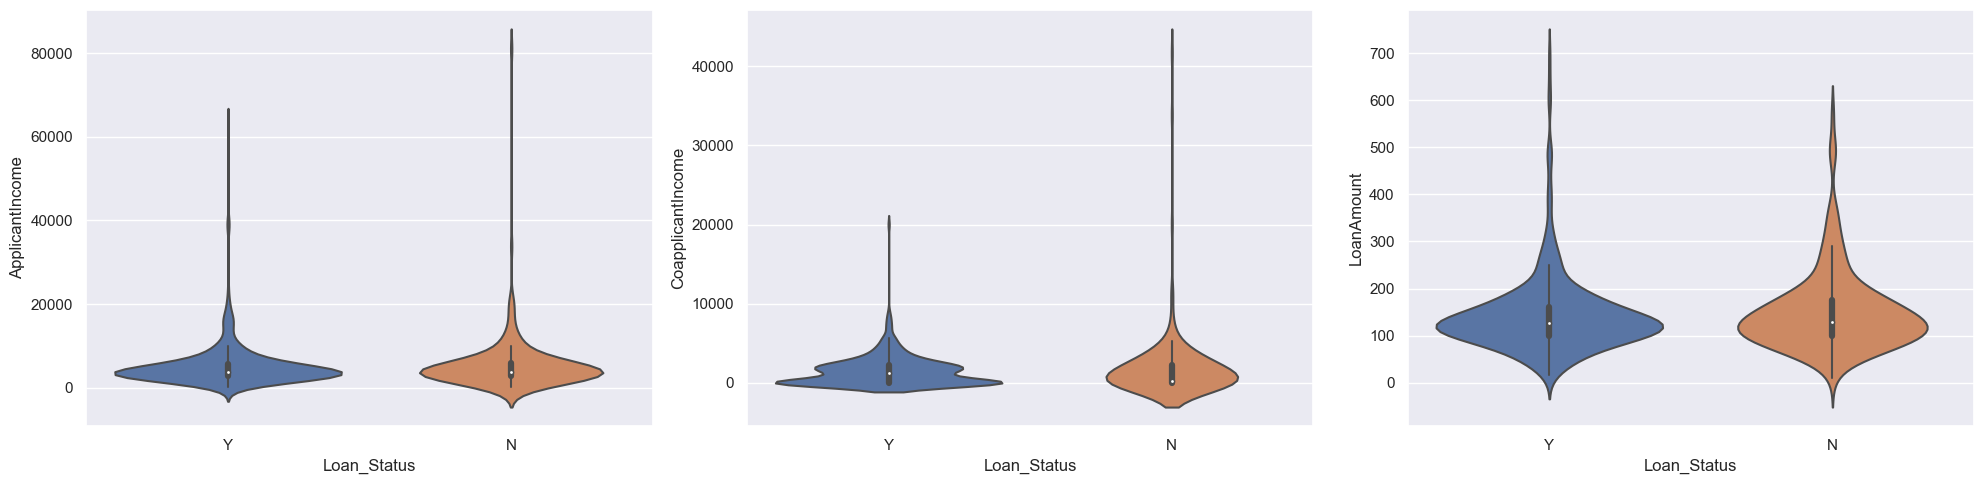

In [137]:
visualize_numerical_data_with_target(train, numerical_var, 'Loan_Status', 1, 3, (20, 5), 'violin')

### Insights from the bivariate analysis

- Gender and Self_Employed features don’t seem to have any impact on the loan status.
- Married applicants are more likely to be approved for loans.
- Applicants with 1 or 3+ dependents are less likely to be approved for loans.
- Applicants with credit history as 1 are more likely to be approved.
- Applicants who are not graduates are less likely to be approved.
- Applicants from Semiurban areas are more likely to be approved for loans.
- Applicant income and coapplicante income do not affect the chances of loan approval.

# Data Preprocessing

## Missing Value Treatment

The `check_missing(df)` function below takes a dataframe as an input and outputs the count of null values for each variable.

In [56]:
def check_missing(df):
    return df.isnull().sum().sort_values(ascending=False)

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

In [57]:
check_missing(train)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing Categorical Missing Values

In [58]:
# Imputing categorical missing values
def impute_categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

In [59]:
impute_categorical(train)
check_missing(train)

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
impute_categorical(test)
check_missing(test)

Credit_History       29
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

### Imputing Numerical Missing Values

**Note:** I choosed to impute the missing values with the median of the column because there are outliers in the numerical features.

In [61]:
# Treating numerical missing values
def impuate_numerical(df):
    for column in df.columns:
        if df[column].dtype != 'object':
            df[column].fillna(df[column].median(), inplace=True)
    return df

In [62]:
impuate_numerical(train)
check_missing(train)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
impuate_numerical(test)
check_missing(test)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [64]:
train.drop(['Loan_ID'], axis=1, inplace=True)
test.drop(['Loan_ID'], axis=1, inplace=True)

## Categorical Features Encoding

In [65]:
for column in train.columns:
    if train[column].dtype == 'object' or train[column].name == 'Loan_Amount_Term':
        print(f'{column} : {train[column].unique()}')

Gender : ['Male' 'Female']
Married : ['No' 'Yes']
Dependents : ['0' '1' '2' '3+']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes']
Loan_Amount_Term : [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [66]:
# Encoding categorical variables
def encode_categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].name == 'Loan_Amount_Term':
            le = LabelEncoder()
            le.fit(df[column].unique())
            df[column] = le.transform(df[column])
            print (f"{column}: {df[column].unique()}")

In [67]:
encode_categorical(train)

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Loan_Amount_Term: [8 4 6 5 2 7 9 1 3 0]
Property_Area: [2 0 1]
Loan_Status: [1 0]


## Correlation Matrix

<AxesSubplot:>

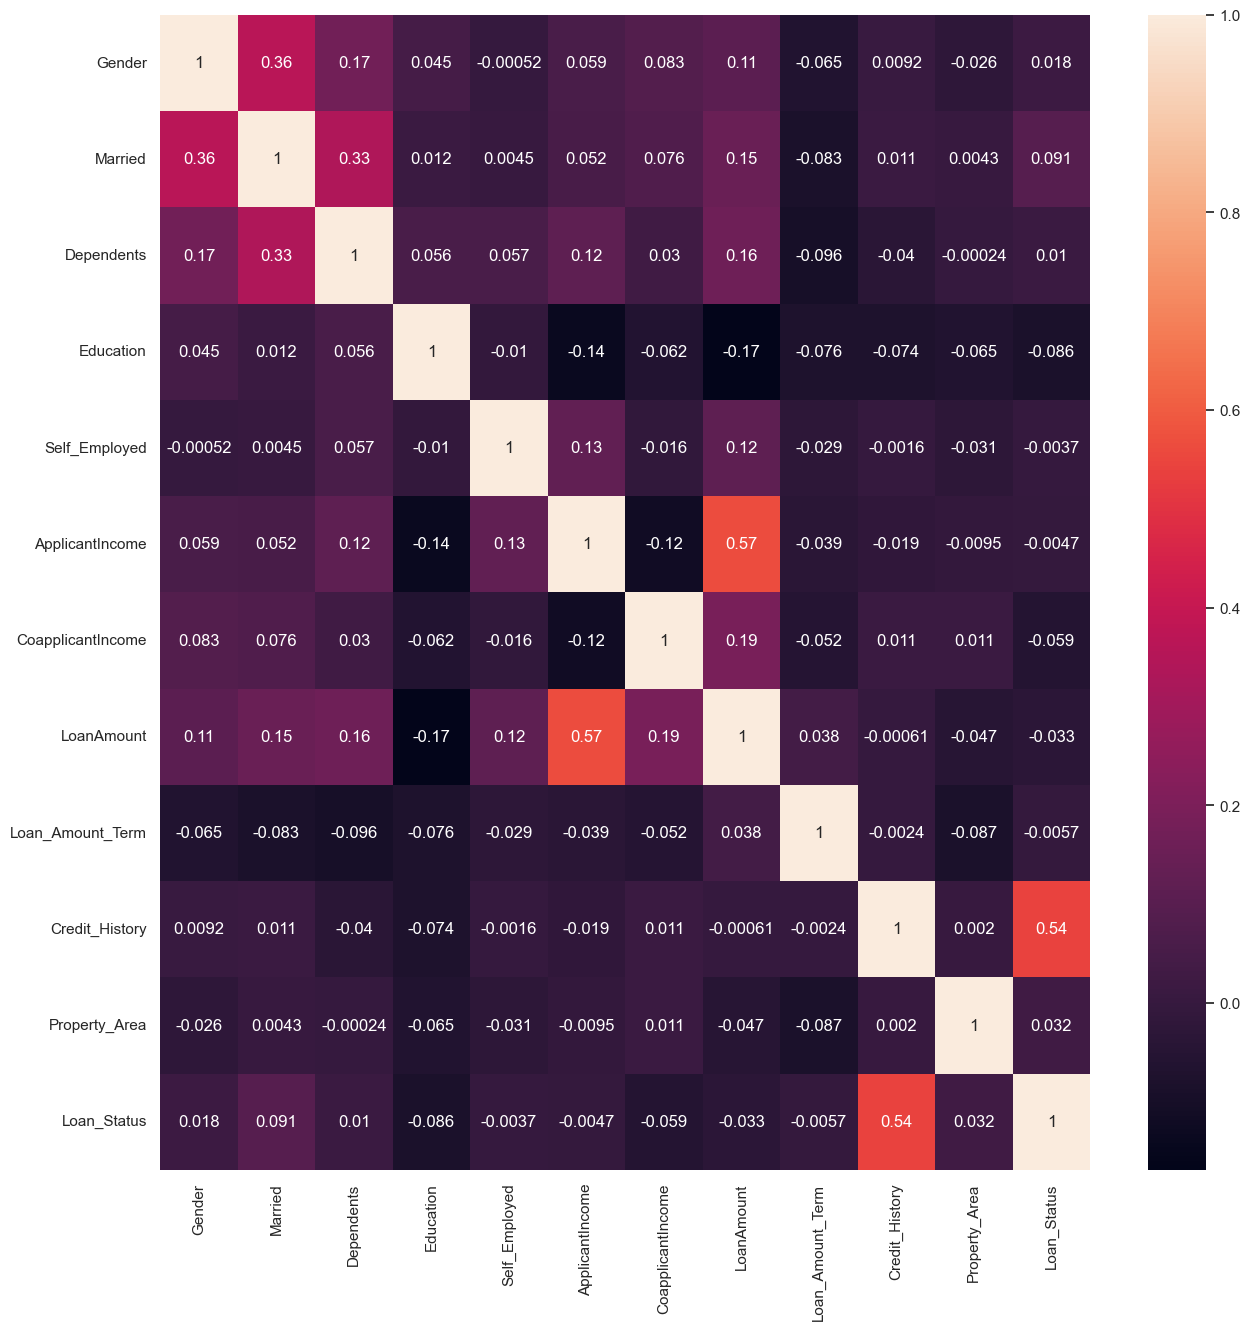

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), fmt='.2g', annot=True)

## Outliers Treatment 

In [68]:
out = []
def z_score_outlier(col):
    m = np.mean(col)
    std = np.std(col)
    for i in col:
        z = (i - m) / std
        if np.abs(z) > 3:
            out.append(i)
    print(out)


In [69]:
z_score_outlier(t_copy['ApplicantIncome'])

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]


In [71]:
out=[]
indices = []
def iqr_outliers(df):

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3-q1

    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
            indices.append(df[df==i].index[0])

    print(q1,q3,iqr,Lower_tail,Upper_tail)
    print("Outliers:", out)
    print("indices:",indices)
    print("Number of outliers:",len(out))

iqr_outliers(t_copy['ApplicantIncome'])

2877.5 5795.0 2917.5 -1498.75 10171.25
Outliers: [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]
indices: [9, 34, 54, 67, 102, 106, 115, 119, 126, 128, 130, 138, 144, 146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 115, 284, 308, 324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483, 487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 191]
Number of outliers: 50


In [72]:
t_copy.iloc[indices]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [154]:
# combine Applicante income and Coapplicant income into one column
t_copy['Total_Income'] = t_copy['ApplicantIncome'] + t_copy['CoapplicantIncome']



In [155]:
# drop rows where Total income is greater than 9000
t_copy.drop(t_copy[t_copy['Total_Income'] > 10000].index, inplace=True)


<AxesSubplot:ylabel='Total_Income'>

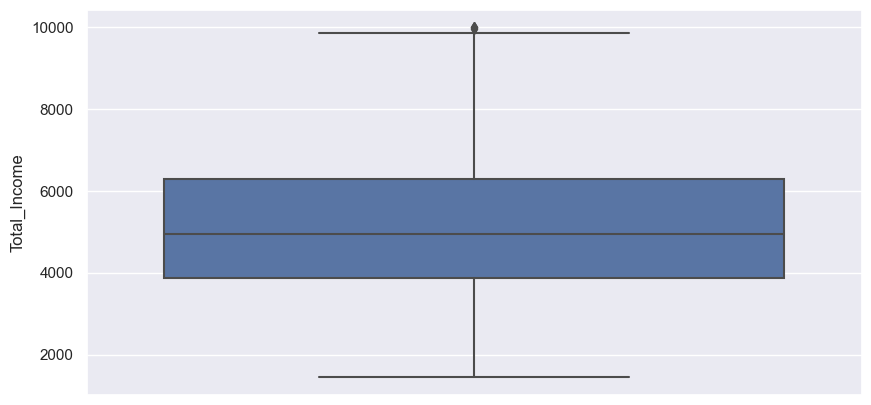

In [156]:
# plot boxplot for Total Income
plt.figure(figsize=(10, 5))
sns.boxplot(y='Total_Income', data=t_copy)





In [157]:
t_copy.shape

(527, 13)

<AxesSubplot:ylabel='Total_Income'>

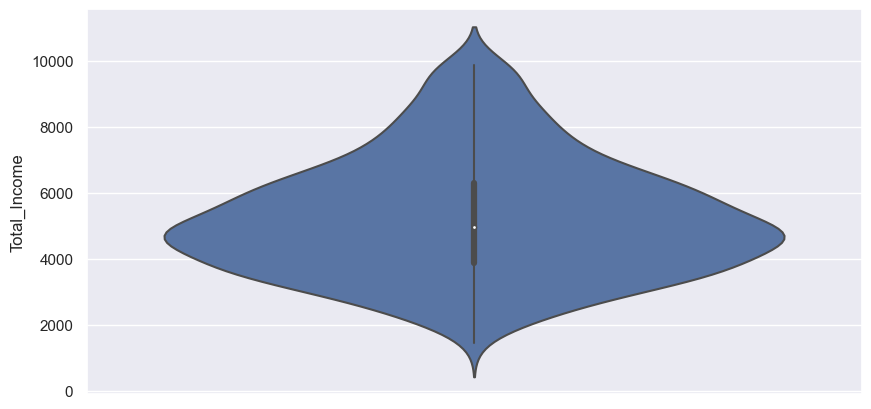

In [158]:
# plot violin plot for total income
plt.figure(figsize=(10, 5))
sns.violinplot(y='Total_Income', data=t_copy)


# Developing the Model

## Splitting the dataset

In [170]:


X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [171]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,1,1,0,1,0,2454,2333.0,181.0,360.0,0.0,2
601,1,1,0,1,0,2894,2792.0,155.0,360.0,1.0,0
261,1,0,0,0,0,2060,2209.0,134.0,360.0,1.0,1
496,1,1,0,1,0,2600,1700.0,107.0,360.0,1.0,0
529,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1


## Logistic Regression

In [1]:
model = LogisticRegression()
model.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [173]:
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.7891891891891892

In [180]:
print("Training Accuracy :", model.score(X_train, y_train))

print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.8205128205128205
Testing Accuracy : 0.7891891891891892


In [174]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [175]:
encode_categorical(test)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [177]:
model.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Stratified k-folds Cross-validation

In [195]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print(f"Fold {i}:")
  x_train, x_val = X.iloc[train_index], X.iloc[test_index]
  y_train, y_val = y.iloc[train_index], y.iloc[test_index]

  logi = LogisticRegression(solver='lbfgs', max_iter=1000)
  logi.fit(x_train, y_train)
  predict = logi.predict(x_val)

  score = accuracy_score(y_val, predict)
  scores.append(score)
  print('Accuracy Score: ', score)


Fold 0:
Accuracy Score:  0.8048780487804879
Fold 1:
Accuracy Score:  0.8455284552845529
Fold 2:
Accuracy Score:  0.7967479674796748
Fold 3:
Accuracy Score:  0.8130081300813008
Fold 4:
Accuracy Score:  0.7868852459016393


In [196]:
print('Confusion Matrix\n',confusion_matrix(y_val,logi.predict(x_val)))
print('\nMean CV Score',np.mean(scores))

Confusion Matrix
 [[14 24]
 [ 2 82]]

Mean CV Score 0.8094095695055312


Text(0.5, 1.0, 'ROC')

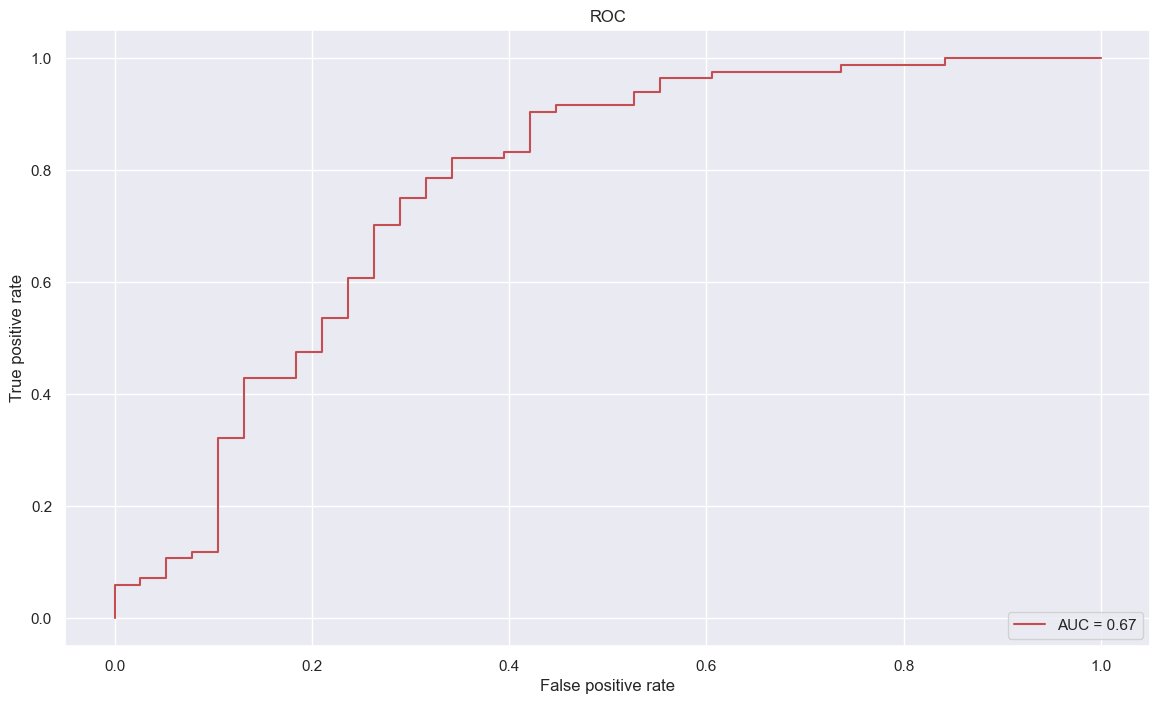

In [201]:
false_pos, true_pos, _ = metrics.roc_curve(y_val, logi.predict_proba(x_val)[:,1])
auc = metrics.roc_auc_score(y_val, predict)

plt.figure(figsize=(14,8))
plt.plot(false_pos,true_pos,'r',label = 'AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC')